In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Probably Approximately Correct Learning

We are given a set of \( N \) training examples \( X = \{ (x_1, y_1), \ldots, (x_N, y_N) \} \) drawn randomly from \( X \times Y \) according to distribution \( D_s \), where \( Y \) is the label set consisting of just two possible labels \( Y = \{0, 1\} \) in two-classification or \( C \) possible labels \( Y \in \{1, \ldots, C\} \) in multi-classification. A machine learner is to find a hypothesis or representation \( h_f \) which is consistent with most of the sample (i.e., \( h_f(x_i) = y_i \) for most \( 1 \leq i \leq N \)). In general, a hypothesis which is accurate on the training set might not be accurate on examples outside the training set; this problem is sometimes referred to as “overfitting” [97]. To avoid overfitting is one of the important problems that must be considered in machine learning.

### Definition 6.7: Probably Approximately Correct (PAC) Model [141]

Let \( C \) be a concept class over \( X \). \( C \) is said to be probably approximately correct (PAC) learnable if there exists an algorithm \( L \) with the property: given an error parameter \( \epsilon \) and a confidence parameter \( \delta \), for every concept \( c \in C \), for every distribution \( D_s \) on \( X \), and for all \( 0 \leq \epsilon \leq \frac{1}{2} \) and \( 0 \leq \delta \leq \frac{1}{2} \), if \( L \), after some amount of time, outputs a hypothesis concept \( h \in C \) satisfying \( \text{error}(h) \leq \epsilon \) with probability \( 1 - \delta \). If \( L \) runs in time polynomial in \( \frac{1}{\epsilon} \) and \( \frac{1}{\delta} \), then \( C \) is said to be efficiently PAC learnable. The hypothesis \( h \in C \) of the PAC learning algorithm is “approximately correct” with high probability, hence is named as “Probably Approximately Correct” (PAC) learning [141].

In machine learning, it is usually difficult and even impracticable to find a learner whose concept over \( X \), \( c(x_i) = y_i \) for all labels \( 1 \leq i \leq N \). Hence, the goal of PAC learning is to find a hypothesis \( h : X \to \{0, 1\} \) which is consistent with most (rather than all) of the sample (i.e., \( h(x_i) = y_i \) for most \( 1 \leq i \leq N \)). After some amount of time, the learner must output a hypothesis \( h : X \to \{0, 1\} \). The value \( h(x) \) can be interpreted as a randomized prediction of the label of \( x \) that is 1 with probability \( h(x) \) and 0 with probability \( 1 - h(x) \).

### Definition 6.8: Strong PAC-Learning Algorithm [97]

A strong PAC-learning algorithm is an algorithm that, given an accuracy \( \epsilon > 0 \) and a reliability parameter \( \delta > 0 \) and access to random examples, outputs with probability \( 1 - \delta \) a hypothesis with error at most \( \epsilon \).

### Definition 6.9: Weak PAC-Learning Algorithm [97]

A weak PAC-learning algorithm is an algorithm that, given an accuracy \( \epsilon > 0 \) and access to random examples, outputs with probability \( 1 - \delta \) a hypothesis with error at least \( \frac{1}{2} - \gamma \), where \( \gamma > 0 \) is either a constant or decreases as \( 1/p \) where \( p \) is a polynomial in the relevant parameters.

In strong PAC learning, the learner is required to generate a hypothesis whose error is smaller than the required accuracy \( \epsilon \). On the other hand, in weak PAC learning, the accuracy of the hypothesis is required to be just slightly better than \( \frac{1}{2} \), which is the accuracy of a completely random guess. When learning with respect to a given distribution over the instances, weak and strong learning are not equivalent. For a great assortment of learning problems, the “boosting algorithm” can convert a “weak” PAC learning algorithm that performs just slightly better than random guessing into one with arbitrarily high accuracy [97].

There are two frameworks in which boosting can be applied: boosting by filtering and boosting by sampling [96].

Adaptive boosting (AdaBoost) of Freund and Schapire [97] is a popular boosting algorithm by sampling, which has been used in conjunction with a wide range of other machine learning algorithms to enhance their performance.

Finding multiple weak classification algorithms with low recognition rate is much easier than finding a strong classification algorithm with high recognition rate. AdaBoost aims at boosting the accuracy of a weak learner by carefully adjusting the weights of training instances and learning a classifier accordingly. After \( T \) such iterations, the final hypothesis \( h_f \) is output. The hypothesis \( h_f \) combines the outputs of the \( T \) weak hypotheses using a weighted majority vote. 

### Algorithm 6.6: Adaptive Boosting (AdaBoost) Algorithm [97]

1. **input:**
   1.1. sequence of \( N \) labeled examples \( \{ (x_1, y_1), \ldots, (x_N, y_N) \} \),
   1.2. distribution \( D \) over the \( N \) examples,
   1.3. weak learning algorithm WeakLearn,
   1.4. integer \( T \) specifying number of iterations.
2. **initialization:** the weight vector \( w_i^1 = D(i) \) for \( i = 1, \ldots, N \).
3. **for** \( t = 1 \) **to** \( T \) **do**
   4. Set \( p_t = \frac{\sum_{i=1}^N w_i^t}{N} \).
   5. Call WeakLearn, providing \( \{ (x_i, y_i) \} \) with the distribution \( p_t \); get back a hypothesis \( h_t : X \to \{0, 1\} \).
   6. Calculate the error \( \epsilon_t = \frac{\sum_{i=1}^N p_i \left| h_t(x_i) - y_i \right|}{N} \).
   7. Set \( \beta_t = \frac{\epsilon_t}{1 - \epsilon_t} \).
   8. Set the new weights vector to be \( w_i^{t+1} = w_i^t \cdot \beta_t^{\left| h_t(x_i) - y_i \right|} \).
9. **output:** the hypothesis
   $$
   h_f(x) =
   \begin{cases}
   1, & \text{if } \sum_{t=1}^T \log\frac{1}{\beta_t} \cdot h_t(x) \geq \frac{1}{2} \sum_{t=1}^T \log\frac{1}{\epsilon_t} \\
   0, & \text{otherwise}
   \end{cases}
   $$

Friedman et al. [100] analyze the AdaBoost procedures from a statistical perspective: AdaBoost can be rederived as a method for fitting an additive model \( m \) in a forward stagewise manner, which largely explains why it tends to outperform a single base learner. By fitting an additive model of different and potentially simple functions, it expands the class of functions that can be approximated. Using Newton stepping rather than exact optimization at each step, Friedman et al. [100] proposed a modified version of the AdaBoost algorithm, called the “Gentle AdaBoost” procedure, which instead takes adaptive Newton steps much like the LogitBoost algorithm, see Algorithm 6.7.


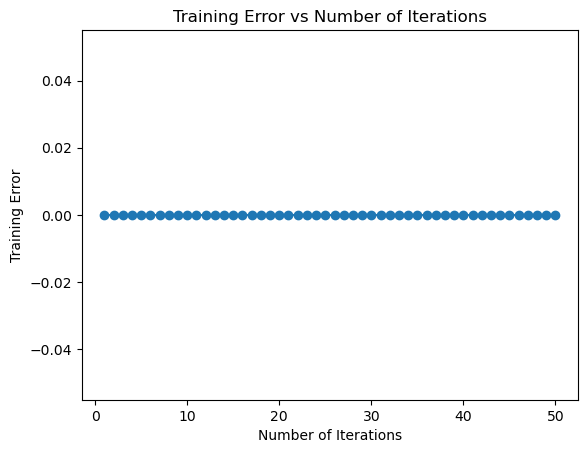

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class AdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, weak_learner, n_estimators=50):
        self.weak_learner = weak_learner
        self.n_estimators = n_estimators

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alphas_ = np.zeros(self.n_estimators)
        self.estimators_ = []
        self.errors_ = []

        # Initialize weights
        self.weights_ = np.ones(n_samples) / n_samples
        
        for t in range(self.n_estimators):
            # Create a new weak learner with the current weights
            weak_model = self.weak_learner()
            weak_model.fit(X, y, sample_weight=self.weights_)
            y_pred = weak_model.predict(X)
            
            # Calculate the error
            error = np.sum(self.weights_ * (y_pred != y)) / np.sum(self.weights_)
            self.errors_.append(error)
            
            # Avoid division by zero and update alpha
            if error == 0:
                alpha = 1.0
            else:
                alpha = 0.5 * np.log((1 - error) / error)
            
            self.alphas_[t] = alpha
            self.estimators_.append(weak_model)
            
            # Update weights
            self.weights_ *= np.exp(alpha * (y_pred != y))
            self.weights_ /= np.sum(self.weights_)
        
        return self

    def predict(self, X):
        # Compute the weighted vote
        pred = np.zeros(X.shape[0])
        for alpha, estimator in zip(self.alphas_, self.estimators_):
            pred += alpha * estimator.predict(X)
        return np.sign(pred)

    def plot_errors(self):
        plt.plot(range(1, self.n_estimators + 1), self.errors_, marker='o')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Training Error')
        plt.title('Training Error vs Number of Iterations')
        plt.show()

# Create synthetic data
X, y = make_classification(n_samples=500, n_features=20, n_informative=15, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train AdaBoost model
ada = AdaBoostClassifier(weak_learner=DecisionTreeClassifier, n_estimators=50)
ada.fit(X_train, y_train)

# Plot the training error
ada.plot_errors()


### Algorithm 6.7 Gentle AdaBoost [100]

1. **Input**: 
   \[
   w_i = \frac{1}{N}, \, i = 1, \ldots, N, \quad F(x) = 0
   \]

2. **For** \( m = 1 \) **to** \( M \) **do**:
   \[
   \text{Fit the regression function } f_m(x) \text{ by weighted least squares of } y_i \text{ to } x_i \text{ with weights } w_i.
   \]
   
   \[
   \text{Update } F(x) \leftarrow F(x) + f_m(x).
   \]
   
   \[
   \text{Update } w_i \leftarrow w_i \exp\left(-y_i f_m(x_i)\right) \text{ and renormalize}.
   \]

3. **End for**

4. **Output**: 
   \[
   \text{The classifier } \text{sign}\left[F(x)\right] = \text{sign}\left[\sum_{m=1}^M f_m(x)\right]
   \]


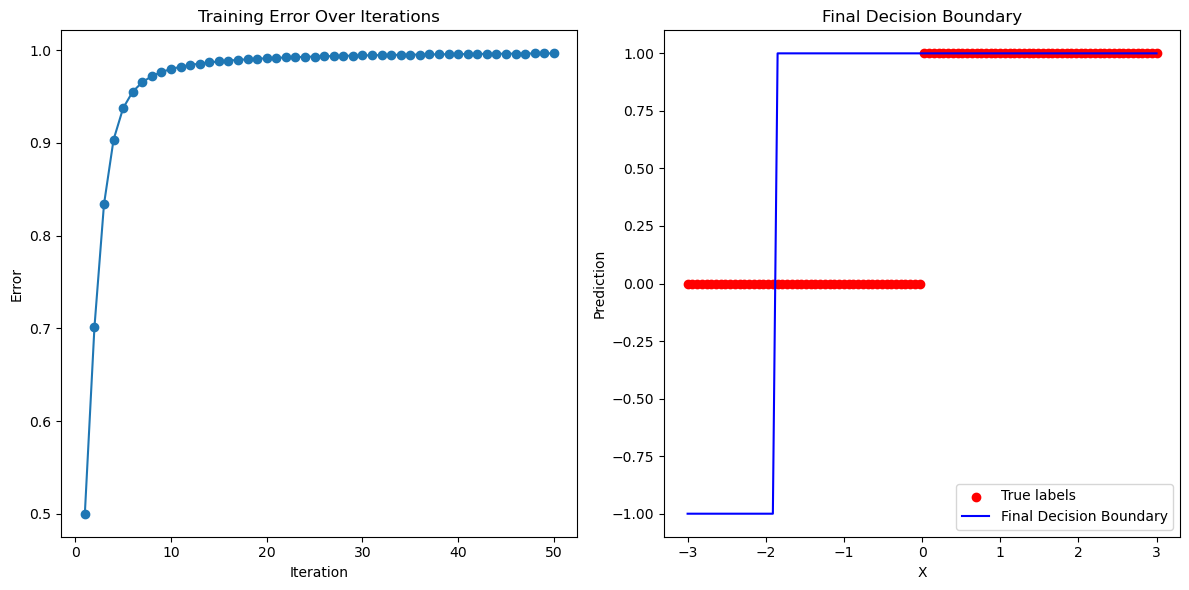

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(0)
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = (X > 0).astype(int).ravel()  # Binary classification

# Gentle AdaBoost Implementation
def gentle_adaboost(X, y, M):
    N = len(y)
    weights = np.ones(N) / N
    F = np.zeros(N)
    errors = []
    
    for m in range(M):
        # Fit regression model with weighted least squares
        model = LinearRegression()
        model.fit(X, y, sample_weight=weights)
        fm = model.predict(X)
        
        # Update F(x)
        F += fm
        
        # Update weights
        predictions = np.sign(F)
        misclassified = (y != predictions).astype(int)
        error = np.sum(weights * misclassified) / np.sum(weights)
        errors.append(error)
        
        # Update weights and renormalize
        weights *= np.exp(-y * fm)
        weights /= np.sum(weights)
    
    return F, errors

# Parameters
M = 50  # Number of iterations

# Train Gentle AdaBoost model
F, errors = gentle_adaboost(X, y, M)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the training error over iterations
plt.subplot(1, 2, 1)
plt.plot(range(1, M+1), errors, marker='o')
plt.title('Training Error Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Plot the final decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X, y, c='red', label='True labels')
plt.plot(X, np.sign(F), color='blue', label='Final Decision Boundary')
plt.title('Final Decision Boundary')
plt.xlabel('X')
plt.ylabel('Prediction')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import random
import math

# Generate synthetic data
def generate_data(N):
    X = [i / 10.0 - 3 for i in range(N)]  # Values from -3.0 to 3.0
    y = [1 if x > 0 else -1 for x in X]  # Binary labels based on the sign of x
    return X, y

# Fit weighted least squares regression (simple version)
def weighted_least_squares(X, y, weights):
    X_mean = sum(x * w for x, w in zip(X, weights)) / sum(weights)
    y_mean = sum(y_i * w for y_i, w in zip(y, weights)) / sum(weights)
    numerator = sum((x - X_mean) * (y_i - y_mean) * w for x, y_i, w in zip(X, y, weights))
    denominator = sum((x - X_mean) ** 2 * w for x, w in zip(X, weights))
    if denominator == 0:
        return 0
    return numerator / denominator

# Gentle AdaBoost Implementation
def gentle_adaboost(X, y, M):
    N = len(y)
    weights = [1.0 / N] * N
    F = [0] * N
    errors = []

    for _ in range(M):
        # Fit regression model with weighted least squares
        fm = weighted_least_squares(X, y, weights)
        
        # Update F(x)
        F = [F_i + fm for F_i in F]

        # Calculate errors
        predictions = [1 if f > 0 else -1 for f in F]
        error = sum(w * (yi != pred) for w, yi, pred in zip(weights, y, predictions)) / sum(weights)
        errors.append(error)

        # Update weights and renormalize
        weights = [w * math.exp(-yi * fm) for w, yi in zip(weights, y)]
        weight_sum = sum(weights)
        if weight_sum != 0:
            weights = [w / weight_sum for w in weights]

    return F, errors

# Plotting the results using simple text-based output
def plot_results(X, y, F, errors, M):
    # Plot training error
    print("Training Error Over Iterations:")
    for i, error in enumerate(errors):
        print(f"Iteration {i + 1}: Error = {error:.4f}")

    # Plot final decision boundary
    print("\nFinal Decision Boundary:")
    step = (max(X) - min(X)) / 50
    x_range = [min(X) + i * step for i in range(51)]
    decision_boundary = [1 if f > 0 else -1 for f in F]

    for x in x_range:
        y_pred = 1 if sum(1 if xi > 0 else -1 for xi in X) > 0 else -1
        print(f"x = {x:.1f}, Prediction = {y_pred}")

# Parameters
N = 100
M = 50

# Generate and process data
X, y = generate_data(N)
F, errors = gentle_adaboost(X, y, M)

# Display results
plot_results(X, y, F, errors, M)


Training Error Over Iterations:
Iteration 1: Error = 0.3100
Iteration 2: Error = 0.4288
Iteration 3: Error = 0.5681
Iteration 4: Error = 0.7038
Iteration 5: Error = 0.8123
Iteration 6: Error = 0.8861
Iteration 7: Error = 0.9308
Iteration 8: Error = 0.9564
Iteration 9: Error = 0.9710
Iteration 10: Error = 0.9794
Iteration 11: Error = 0.9846
Iteration 12: Error = 0.9879
Iteration 13: Error = 0.9902
Iteration 14: Error = 0.9918
Iteration 15: Error = 0.9930
Iteration 16: Error = 0.9939
Iteration 17: Error = 0.9946
Iteration 18: Error = 0.9952
Iteration 19: Error = 0.9957
Iteration 20: Error = 0.9960
Iteration 21: Error = 0.9964
Iteration 22: Error = 0.9966
Iteration 23: Error = 0.9969
Iteration 24: Error = 0.9971
Iteration 25: Error = 0.9973
Iteration 26: Error = 0.9974
Iteration 27: Error = 0.9976
Iteration 28: Error = 0.9977
Iteration 29: Error = 0.9978
Iteration 30: Error = 0.9979
Iteration 31: Error = 0.9980
Iteration 32: Error = 0.9981
Iteration 33: Error = 0.9982
Iteration 34: Error 